# Mall Customer Segmentation Data Project

    Importing the labries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
sns.set(color_codes=True)
from sklearn.cluster import KMeans
import mysql.connector

    Loading the Data for Project
        We have taken the data from Kaggle with sample of 200 data sample.

In [2]:
data=pd.read_csv('Mall_Customers.csv')

            summarizing the data

In [3]:
def summarizing(Data):
    print(" Lets analyze the data at the top")
    print(Data.head())
    print('\n')
    print(" Lets analyze the data at the bottom")
    print(Data.tail())
    print('\n')
    print('Describe the data all  columns in particular format')
    print(data.describe())
    print('\n')
    print('Letr try to find any null values present in the data')
    print(Data.isnull().sum())
    print('\n')
    print('Lets try to find the data types we are using in the data')
    print(Data.dtypes)
    

In [4]:
summarizing(data)

 Lets analyze the data at the top
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


 Lets analyze the data at the bottom
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


Describe the data all  columns in particular format
       Cu

In [5]:
def outliers(Data_Columns,data):
    _25th_percentile=np.percentile(Data_Columns,25)
    _75th_percentile=np.percentile(Data_Columns,75)
    IQR=_75th_percentile-_25th_percentile
    Higher_fence=_75th_percentile+1.5*IQR
    Lower_fence=_25th_percentile-1.5*IQR
    data=data[(Lower_fence<Data_Columns)]# & (data['Annual Income (k$)']>=Higher_fence)]
    data=data[(Higher_fence>=Data_Columns)]# & (data['Annual Income (k$)']>=Higher_fence)]
    return data


In [6]:
outliers(data['Spending Score (1-100)'],data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


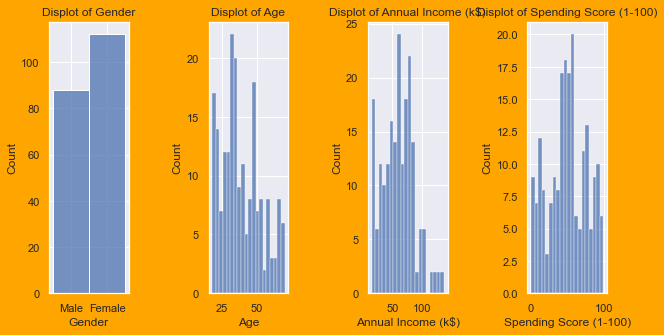

In [7]:
plt.figure(1,figsize=(10,5))
fig = plt.gcf();
fig.set_facecolor('orange')
n=0
for x in ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=1 , wspace=1)
    sns.histplot(data[x],bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()


In [8]:
def presentation_data(data):
    plt.figure(1,figsize=(10,5))
    fig = plt.gcf();
    fig.set_facecolor('orange')
    n=0
    for x in range(1,len(data.columns)): 
        n+=1
        plt.subplot(1,4,n)
        plt.subplots_adjust(hspace=0.1 , wspace=0.1)
        sns.histplot(data[data.columns[x]],bins=50)
        plt.title('Displot of {}'.format(x))
    plt.show()
    plt.figure(figsize=(10,5))
    sns.countplot(y='Gender' , data=data)
    plt.show()


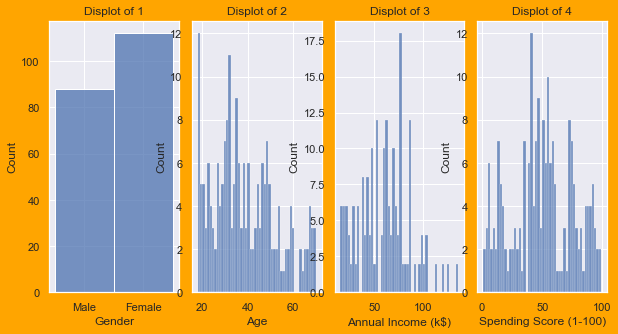

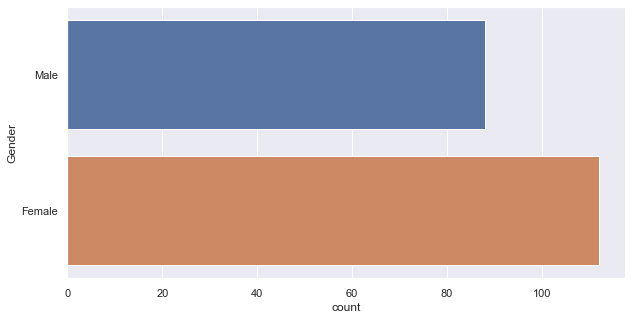

In [9]:
presentation_data(data)

# As the Data having gender which is categorical data(Nominal)

In [10]:
data.drop('CustomerID',axis=1,inplace=True)

In [11]:
def Categorical_Representation(data,Col_name):
    for i in data[Col_name].unique():
        print('Gender_'+i,'\n')
        print((data[data[Col_name]==i].describe()),'\n')
        #sns

In [12]:
Categorical_Representation(data,'Gender')

Gender_Male 

             Age  Annual Income (k$)  Spending Score (1-100)
count  88.000000           88.000000               88.000000
mean   39.806818           62.227273               48.511364
std    15.514812           26.638373               27.896770
min    18.000000           15.000000                1.000000
25%    27.750000           45.500000               24.500000
50%    37.000000           62.500000               50.000000
75%    50.500000           78.000000               70.000000
max    70.000000          137.000000               97.000000 

Gender_Female 

              Age  Annual Income (k$)  Spending Score (1-100)
count  112.000000          112.000000              112.000000
mean    38.098214           59.250000               51.526786
std     12.644095           26.011952               24.114950
min     18.000000           16.000000                5.000000
25%     29.000000           39.750000               35.000000
50%     35.000000           60.000000          

In [13]:
def Violen_plt(data,Violen_col):
    plt.figure(1,figsize=(20,8))
    fig = plt.gcf();
    fig.set_facecolor('orange')
    n=0
    for x in range(1,len(data.columns)): 
        n+=1
        plt.subplot(1,3,n)
        sns.set(style='whitegrid')
        plt.subplots_adjust(hspace=.3 , wspace=.3)
        sns.violinplot(data[data.columns[x]],data[Violen_col],bins=10,linewidth=2);
        plt.title('Displot of {}'.format(x));
        #plt.legend(data.columns[x])
    plt.show();

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


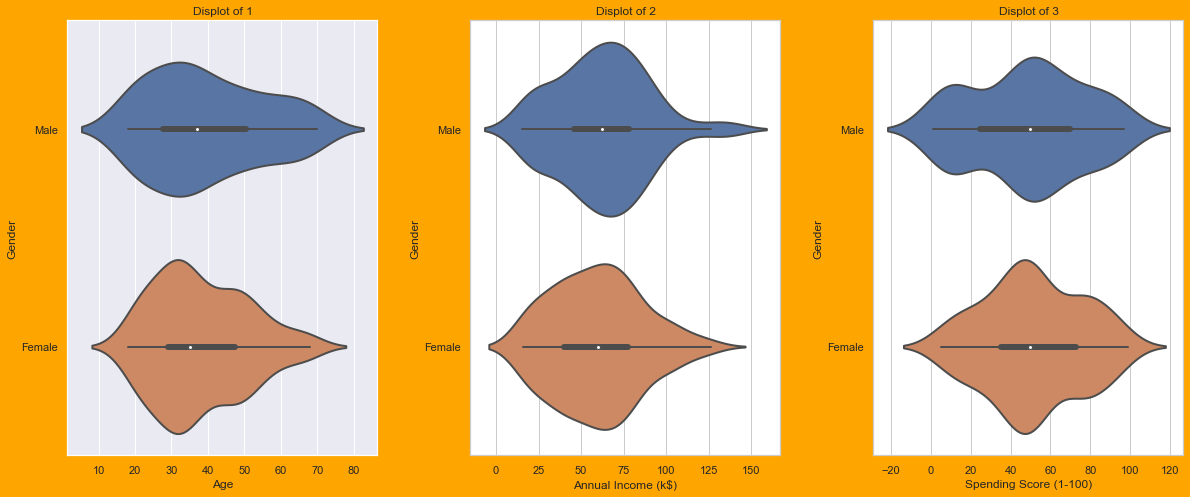

In [14]:
Violen_plt(data,'Gender')

In [15]:
def Count_of(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        result_values.append('Values '+str(i)+'-'+str(i+nod-1))
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]
    df_=pd.DataFrame(result_count,result_values)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    plt.figure(figsize=(15,6))
    sns.barplot(x=df_.index,y=df_['NOC'])
    plt.title('Number of costomer in the specified range')
    plt.xlabel('Number of costomer')
    plt.ylabel('Spending Score')
    plt.xticks(rotation=45)
    #plt.xscale(lower())
    for i, val in enumerate(df_.index):
        y = df_.loc[val].sum()
        plt.text(i, y, str(y), ha="center",fontsize = 15,         color ='red')

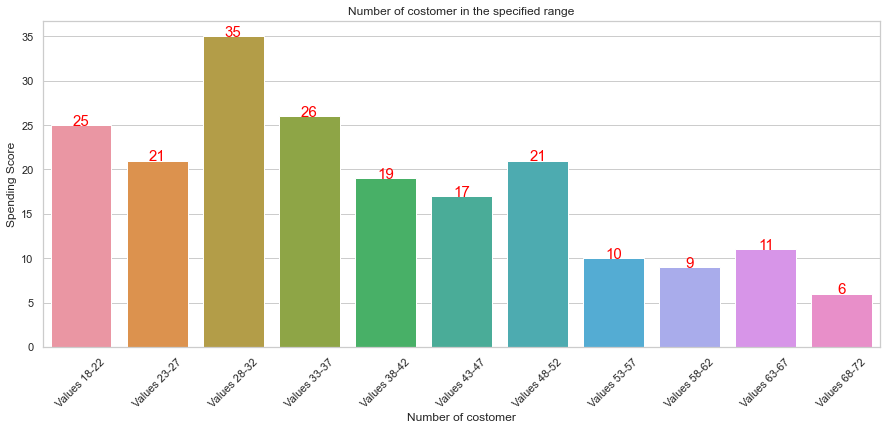

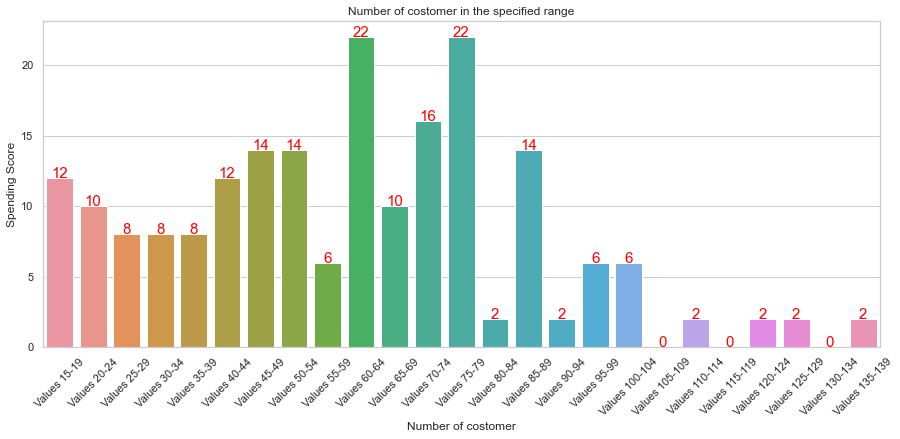

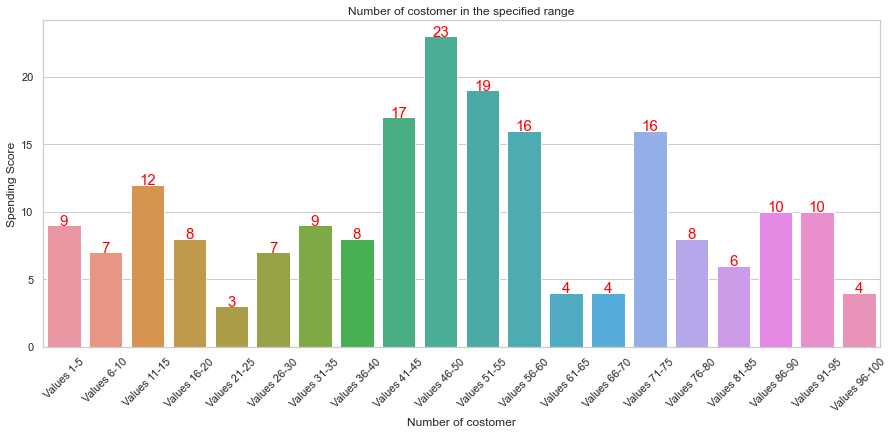

In [16]:
for i in range(1,len(data.columns)): 
   # print(data.columns[i])
    Count_of(data[data.columns[i]],5)

In [17]:
def Count_of_Percentage(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        result_values.append('Values '+str(i)+'-'+str(i+nod-1))
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]
    df_=pd.DataFrame(result_count,result_values)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    df_['NOC_Percentage']=df_['NOC']*100/sum(df_['NOC'])
    df_.drop('NOC',axis=1,inplace=True)
    #print(df_)
    plt.figure(figsize=(15,6))
    sns.barplot(x=df_.index,y=df_['NOC_Percentage'])
    plt.title('Number of costomer in the specified range')
    plt.xlabel('Number of costomer')
    plt.ylabel('Spending Score')
    plt.xticks(rotation=90)
    #plt.xscale(lower())
    for i, val in enumerate(df_.index):
        y = df_.loc[val].sum()
        plt.text(i, y, str(y)+'%', ha="center",fontsize = 15,         color ='red')

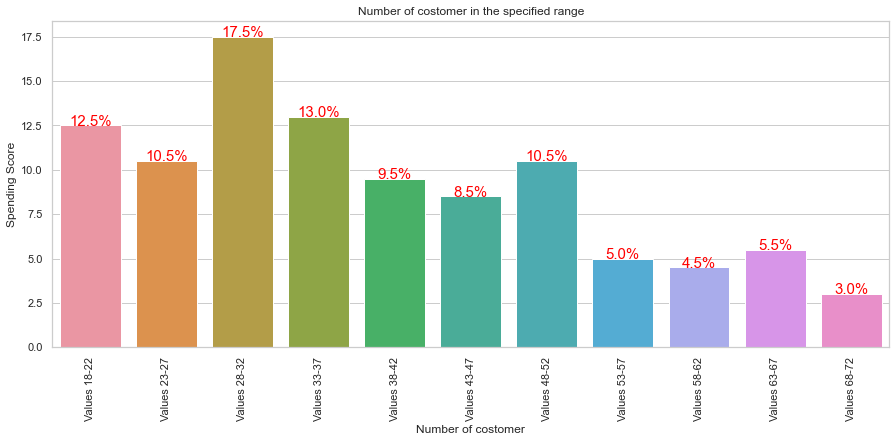

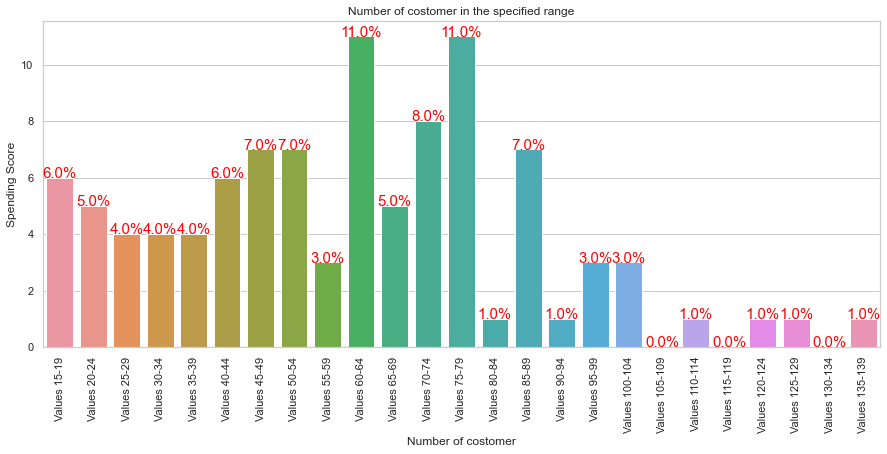

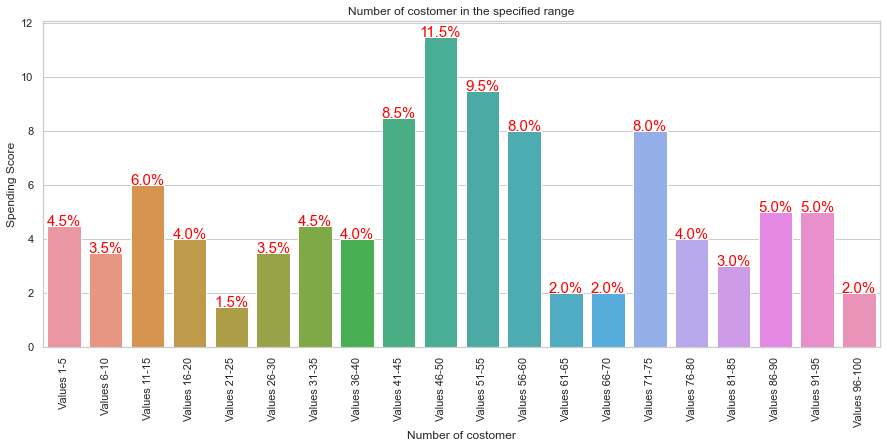

In [18]:
for i in range(1,len(data.columns)): 
   # print(data.columns[i])
    Count_of_Percentage(data[data.columns[i]],5)

In [19]:
def kkmeans_values(Data,Col_name1,Col_name2,Clusters,Line_width_plt, col_plt,
                  front_size_cluster,col_cluster):
    x1=Data.loc[:,[Col_name1,Col_name2]].values
    wcss=[]
    for k in range(1,Clusters):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(x1)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(15,6))
    plt.grid(True)
    plt.plot(range(1,Clusters),wcss,lw=Line_width_plt,color=(col_plt),marker='3');
    plt.xlabel('K_Means',fontsize=50)
    plt.ylabel('WCSS',fontsize=50)
    for i,j in enumerate(wcss):
        j =wcss[i]#.sum()
        plt.text((i),(j),str(i),fontsize=front_size_cluster,color=(col_cluster));
    plt.show();
    Consider_Cluster=int(input("\n Please enter the Number of Cluster considering,\n"))
    kmeans=KMeans(n_clusters=Consider_Cluster)
    k=kmeans.fit_predict(x1)
    plt.figure(figsize=(15,8))
    sns.scatterplot(Col_name1,Col_name2,data=data,c=kmeans.labels_,cmap='rainbow')
    sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='Black',s=100
                , markers='8');

C:\Users\nithi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


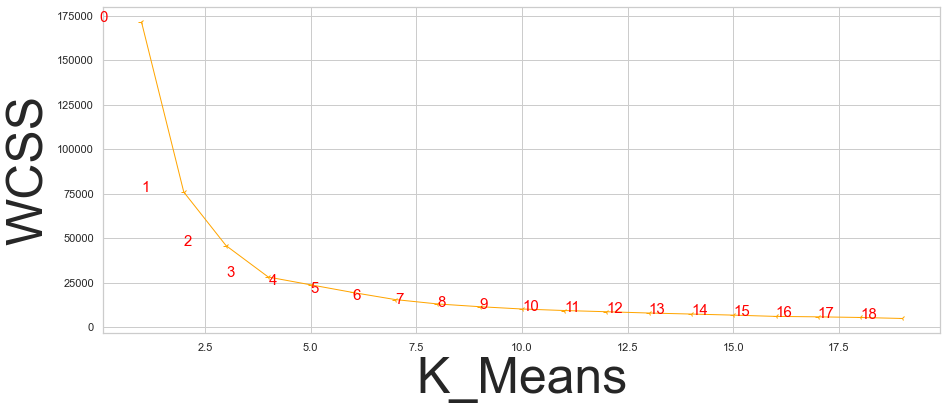


 Please enter the Number of Cluster considering,
10


C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


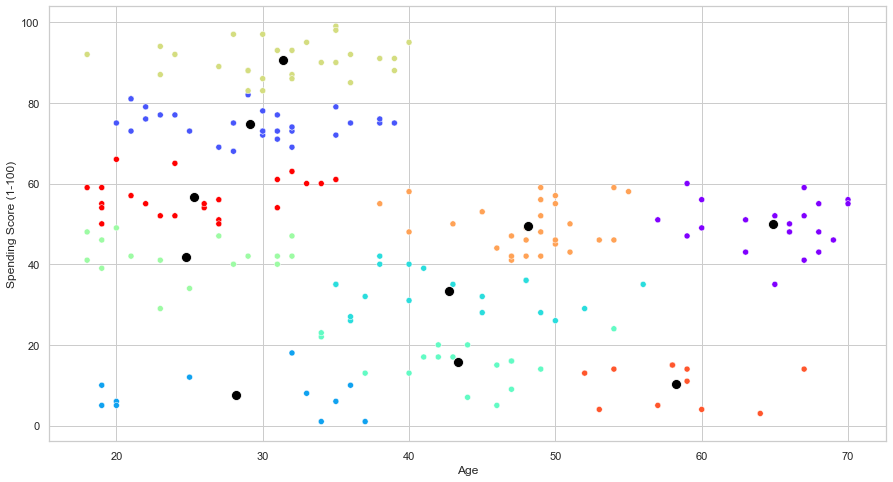

In [22]:
kkmeans_values(data,'Age','Spending Score (1-100)',20,1,'Orange',15,'red')

C:\Users\nithi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


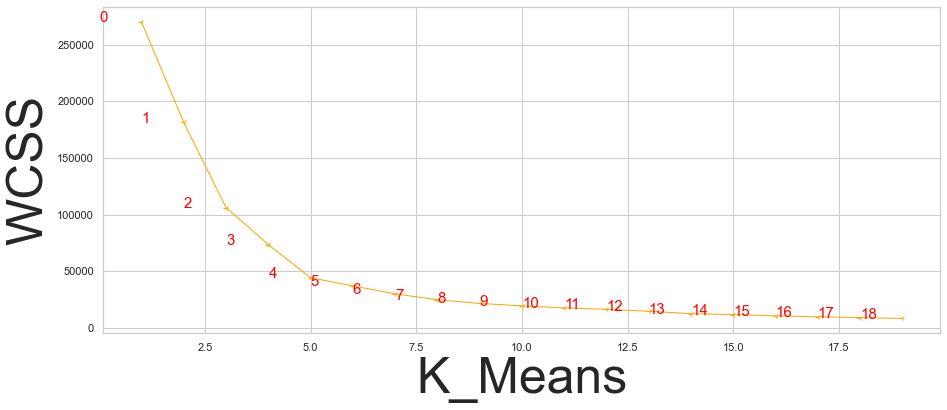


 Please enter the Number of Cluster considering,
10


C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


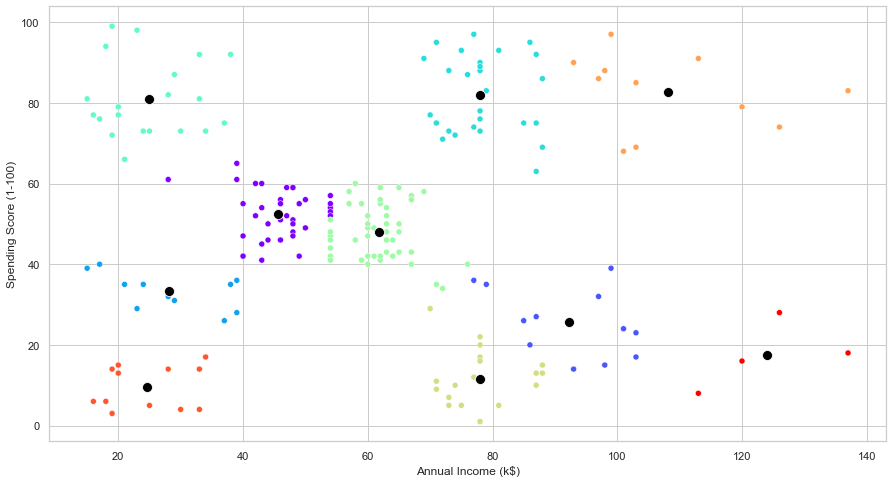

In [23]:
kkmeans_values(data,'Annual Income (k$)','Spending Score (1-100)',20,1,'Orange',15,'red')